In [27]:
# import sys

# from IPython.display import Image, display
# if 'google.colab' in sys.modules:
#     from google.colab import drive
#     drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'

# Perceptrón Multicapa (PMC)
La figura a continuación, muestra una red neuronal de 3 capas:
- Capa de entrada _(in)_, no se cuenta como capa en sí y corresponde a los datos de entrada
- Capa oculta _(h)_
- Capa de salida _(o)_


In [28]:
# display(Image(filename='./2_imagenes/MLP.png', width=800))

Llamamos a la salida del _i-ésimo_ nodo en la _l-ésima_ capa: $a_i^{(l)}$.

$X_0^{(in)}$ y $a_0^{(h)}$ son las **unidades de bias** los cuales igualamos a 1.

Cada nodo en la capa $l$ está conectado a todos los nodos en la capa  $l+1$ a través de un coeficiente de la matriz de pesos. Como ejemplo, la conexión entre el _k-ésimo_ nodo en la capa $l$ al _j-ésimo_ nodo en la capa $l+1$ sería $w_{k,j}^{(l)}$. Cuando todas las neuronas en una capa están conectadas a cada neurona de la capa anterior, la capa se denomina _densa_ o _fully connected_.

Denominamos $W^{(h)}$ la matriz de pesos que conecta las entradas con la capa oculta y $W^{(o)}$ la matriz de pesos que conecta una capa oculta a la capa de salida.

La matriz de pesos $W^{(h)}$ tiene dimensiones $d$ x $m$ donde _d_ es el número de nodos de la capa oculta y _m_ es el número de entradas mas la unidad de bias.

## Algoritmo de entrenamiento de un Perceptrón Multicapa

1. Iniciando en la capa de entrada, propagamos hacia adelante los datos de entrenamiento a través de la red para obtener la salida.
2. En base a la salida de la red, calculamos el error que queremos minimizar usando una función de costo.
3. Hacemos la retropropagación del error, hallamos su derivada respecto a cada uno de los pesos en la red y actualizamos los pesos.

Después de repetir estos pasos y los pesos convergen, hacemos la propagación hacia adelante para obtener la salida de la red y aplicamos una función umbral para obtener la predicción de la etiqueta de clase.

## Funciones de activación

Para que el algoritmo de retropropagación funcione correctamente, es necesario cambiar las funciones de activación de cada perceptrón con la función logística.

Existen funciones de activación adicionales que funcionan muy bien con el algoritmo:

**Función Logística o Sigmoidea:** función continua y diferenciable en forma de 'S'. Sus valores de salida varían entre 0 y 1.

$$\sigma(z) = \frac{1}{(1 + exp(-z))}$$

**Función tangente hiperbólica:** similar a la anterior pero sus valores de salida varían entre -1 y 1.

$$\tanh(z) = 2\sigma(2z) -1$$

**Función unidad lineal rectificada (ReLU)** es continua pero no diferenciable en z=0, su derivada es 0 para $z<0$.

$$ReLU(z) = max(0,z)$$

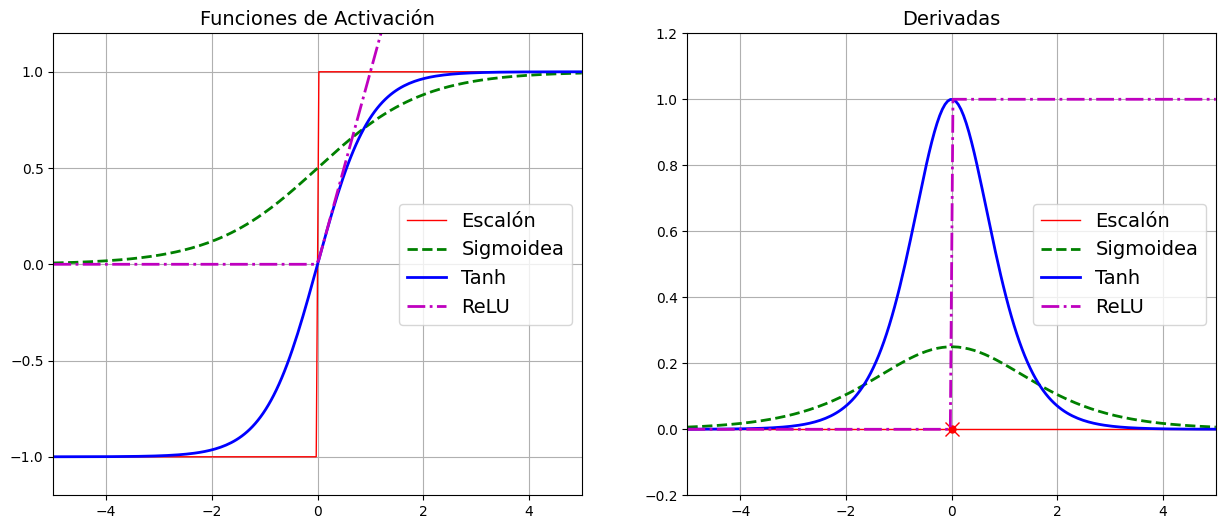

In [126]:
# import numpy as np
# import matplotlib.pyplot as plt

# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))

# def relu(z):
#     return np.maximum(0, z)

# def derivative(f, z, eps=0.000001):
#     return (f(z + eps) - f(z - eps))/(2 * eps)

# z = np.linspace(-5, 5, 200)

# plt.figure(figsize=(15,6))

# plt.subplot(121)
# plt.plot(z, np.sign(z), "r-", linewidth=1, label="Escalón")
# plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoidea")
# plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
# plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
# plt.grid(True)
# plt.legend(loc="center right", fontsize=14)
# plt.title("Funciones de Activación", fontsize=14)
# plt.axis([-5, 5, -1.2, 1.2])

# plt.subplot(122)
# plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Escalón")
# plt.plot(0, 0, "ro", markersize=5)
# plt.plot(0, 0, "rx", markersize=10)
# plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoidea")
# plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
# plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
# plt.grid(True)
# plt.legend(loc="center right", fontsize=14)
# plt.title("Derivadas", fontsize=14)
# plt.axis([-5, 5, -0.2, 1.2])
# plt.show()

### Uso de la clase _MLPClassifier_ de sklearn

A continuación vamos a utilizar la clase _MLPClassifier_ para resolver el problema del XOR.

Los datos de entrada (X) y salida (y) se encuentran en el archivo `datos_xor.mat` en la carpeta "data"

In [1]:
# Importamos las librerías necesarias
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**cargamos y graficamos los datos**

In [2]:
# Cargamos los datos en variables de entrada (X) y salida (y)
datos_mat = sio.loadmat('./1_datos/datos_xor.mat')
X = datos_mat['X']
y = datos_mat['Y'].T

print("X: ", X.shape) # (80, 2)
print("Y: ", y.shape) # (80, 1)

X:  (80, 2)
Y:  (80, 1)


In [3]:
# Modificamos las etiquetas de clase para tener clases 0 y 1
y[y <= 0.5] = 0
y[y > 0.5] = 1

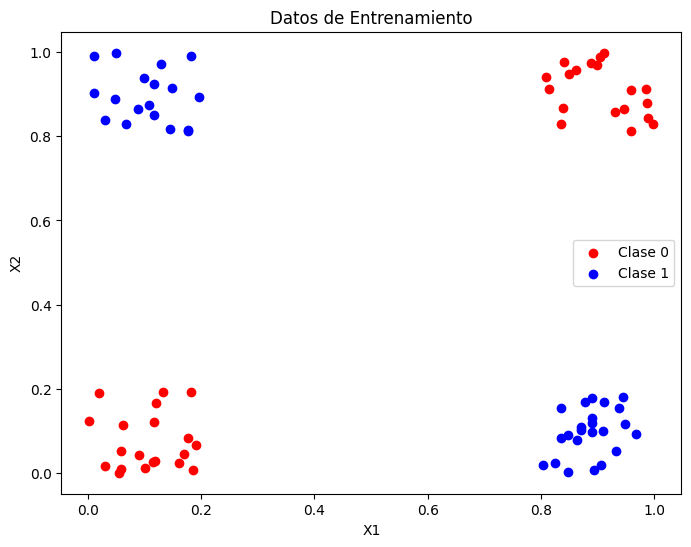

In [4]:
# Graficamos los datos
plt.figure(figsize=(8, 6))
plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], c='r', label='Clase 0')
plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], c='b', label='Clase 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos de Entrenamiento')
plt.legend()
plt.show()

Entrenamos un clasificador _MLPClassifier_ con una capa oculta de 2 neuronas.

Use una función de activación sigmoidea ('logistic')  y un coeficiente de aprendizaje entre `0.1` y `0.5`.

Ver la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) de la clase.

79


C:\Users\Laura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


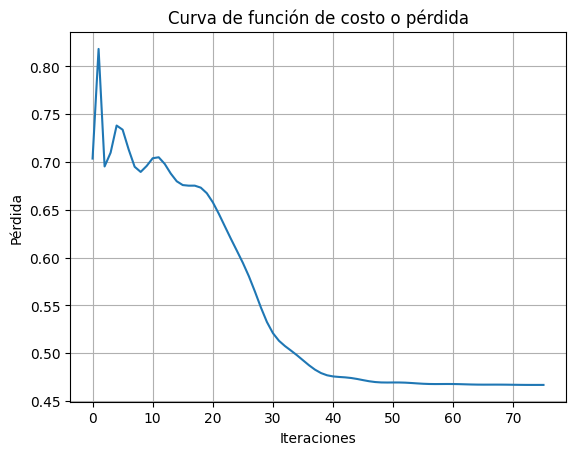

In [5]:
from sklearn.neural_network import MLPClassifier
n = np.random.randint(100)
print(n)

#---------------------------------------------------------
# Separamos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

# Inicializamos el clasificador
# hidden_layer_sizes --> número de neuronas en la capa oculta
# activation --> función de activación
# learning_rate_init --> coeficiente de aprendizaje
clasificador = MLPClassifier(hidden_layer_sizes = (2), activation = 'logistic', learning_rate_init = 0.5, max_iter = 500, random_state = 11) # establecí 11 xq anda ahí, ns si esta bien eso
clasificador.fit(X_train, y_train)

# Graficamos la curva de la función de costo o pérdida loss_curve_
plt.plot(clasificador.loss_curve_)
plt.title('Curva de función de costo o pérdida')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()

Como vimos en clase de teoría. Las neuronas en la capa oculta, estarían realizando una transformación. Es decir, mapean el espacio de entrada (X) a un nuevo espacio (X') donde los datos pueden ser linealmente separados por el nodo en la capa de salida.

In [35]:
#display(Image(filename='./2_imagenes/PMC_transformacion.png', width=1000))

Con los pesos de la capa oculta $w_h$ podemos obtener dos rectas que separan la representación de los datos entrada.

Podemos obtener las rectas a la salida de la capa oculta a partir de estos pesos $w_h$, de forma similar como hacíamos con el perceptrón simple:

$$\begin{pmatrix}1\\x_1\\x_2\end{pmatrix} \begin{pmatrix}w_{01}&w_{11}&w_{21}\\ w_{02}&w_{12}&w_{22}\\ \end{pmatrix} = 0$$

Esto nos dará como resultado dos rectas, de las cuales despejamos la pendiente y ordenada para graficarlas
$$ w_{01} + x_1 w_{11} + x_2 w_{21} = 0$$
$$ w_{02} + x_1 w_{12} + x_2 w_{22} = 0$$

### Obtener los coeficientes de los pesos de la capa oculta (Ver Documentación) y la capa de salida para graficar las rectas

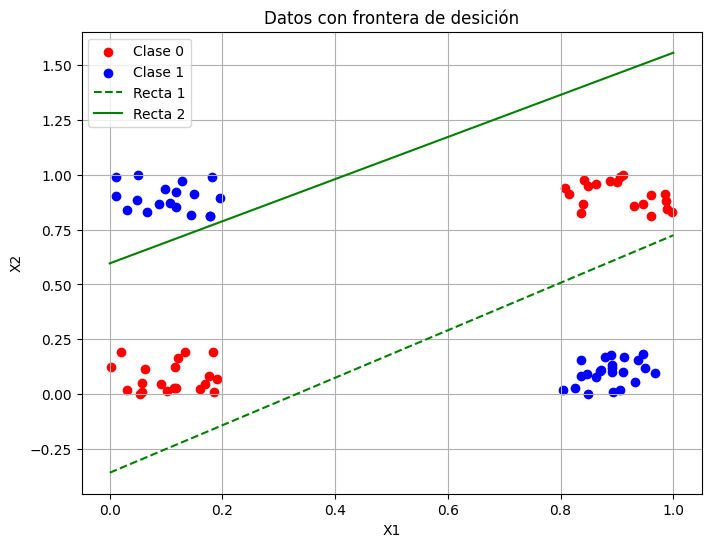

In [6]:
# Obtenga los parámetros de las rectas (pendiente y ordenada) que se forman con los pesos w_h de la capa oculta
#---------------------------------------------------------------------------
pesos_capa_oculta = clasificador.coefs_[0]  # Pesos de la capa oculta
bias_capa_oculta = clasificador.intercepts_[0]  # Bias de la capa oculta

# Calculamos la pendiente y la ordenada al origen para las dos rectas
pendiente_1 = pesos_capa_oculta[0, 0] / pesos_capa_oculta[1, 0]
ordenada_1 = bias_capa_oculta[0] / pesos_capa_oculta[1, 0]

pendiente_2 = pesos_capa_oculta[0, 1] / pesos_capa_oculta[1, 1]
ordenada_2 = bias_capa_oculta[1] / pesos_capa_oculta[1, 1]

# Grafique las 2 rectas junto a los datos
#------------------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], c='r', label='Clase 0')
plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], c='b', label='Clase 1')

x_vals = np.linspace(0, 1, 100)
plt.plot(x_vals, pendiente_1 * x_vals + ordenada_1, 'g--', label='Recta 1')
plt.plot(x_vals, pendiente_2 * x_vals + ordenada_2, 'g-', label='Recta 2')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos con frontera de desición')
plt.legend()
plt.grid(True)
plt.show()

### Visualizando los datos transformados

Para visualizar los datos transformados $\vec{a}^{(h)}$, debemos aplicar la función de activación $\phi()$ a la combinación lineal de las entradas y los pesos de la capa oculta $\vec{z}^{(h)}$ (una vez la red está entrenada)

$$ \vec{z}^{(h)} = \vec{x}^{(in)}.(\vec{W}^{(h)})^T $$

$$ \vec{a}^{(h)} = \phi(\vec{z}^{(h)})$$

$\vec{x}^{(in)}$ corresponde a los datos de entrada X mas el bias

In [7]:
def logistic(z):
    return 1 / (1 + np.exp(-z))

Aplica la función de activación (en este caso, la logística) a la combinación lineal de las entradas y los pesos de la capa oculta para transformar los datos y grafique los datos obtenidos.

In [8]:
def predict(X, pesos, bias):
    return logistic(np.dot(X, pesos) + bias)  # Salida de la neurona

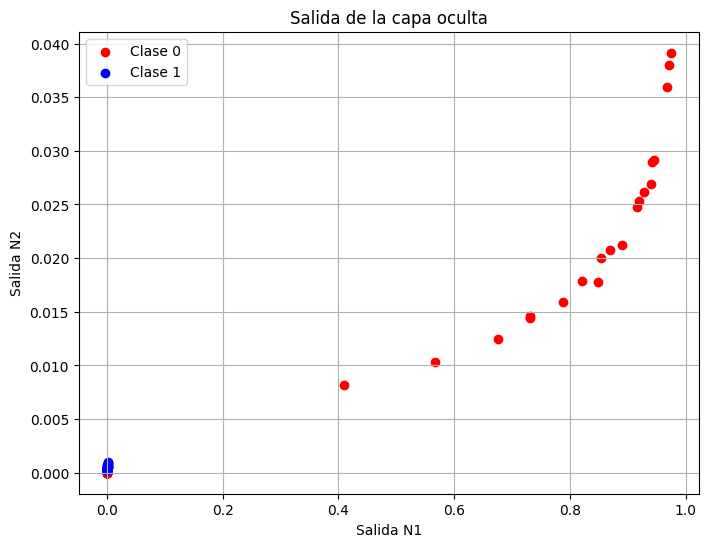

In [9]:
# Grafique la salida de la capa oculta
#------------------------------------------------------------------------------------
salida_capa_oculta = np.dot(X, pesos_capa_oculta) + bias_capa_oculta
salida_capa_oculta = logistic(salida_capa_oculta)

plt.figure(figsize=(8, 6))
plt.scatter(salida_capa_oculta[y.flatten() == 0, 0], salida_capa_oculta[y.flatten() == 0, 1], c='r', label='Clase 0')
plt.scatter(salida_capa_oculta[y.flatten() == 1, 0], salida_capa_oculta[y.flatten() == 1, 1], c='b', label='Clase 1')
plt.xlabel('Salida N1')
plt.ylabel('Salida N2')
plt.title('Salida de la capa oculta')
plt.legend()
plt.grid(True)
plt.show()

### Se debe observar que ahora los datos a la salida de la capa oculta son linealmente separables
Ahora la frontera de decisión podemos encontrarla de la misma forma que hicimos con el perceptrón simple, excepto que esta vez trabajamos con un espacio _X'_ resultado de la transformación:

$$ w_0^{(o)} + x_1' w_1^{(o)} + x_2' w_2^{(o)} = 0$$

$w^{(o)}$ corresponde a los pesos en el nodo de salida

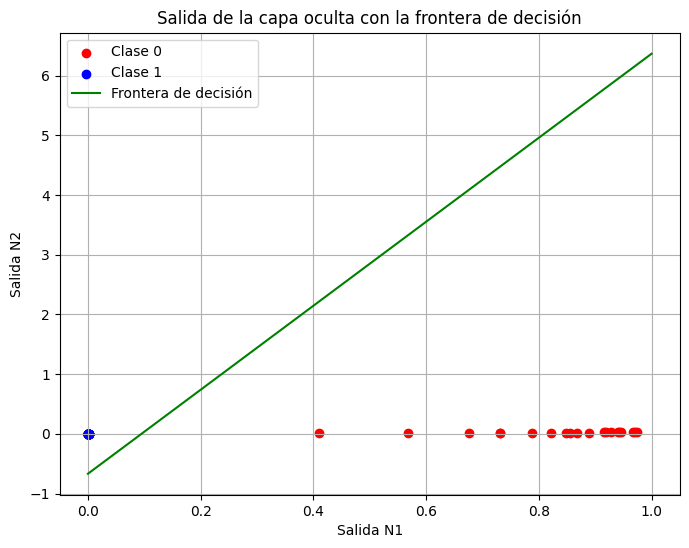

In [10]:
# Con los pesos del nodo en la capa de salida, armar la recta que separe
# los datos en el campo transformado
# --------------------------------------------------------------------------------------------------------
pesos_capa_salida = clasificador.coefs_[1]  # Pesos de la capa de salida
bias_capa_salida = clasificador.intercepts_[1]  # Bias de la capa de salida

# Calculamos la pendiente y la ordenada al origen para la recta
pendiente_salida = pesos_capa_salida[0] / pesos_capa_salida[1]
ordenada_salida = bias_capa_salida / pesos_capa_salida[1]

# Graficar los datos transformados y la recta
#-----------------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(salida_capa_oculta[y.flatten() == 0, 0], salida_capa_oculta[y.flatten() == 0, 1], c='r', label='Clase 0')
plt.scatter(salida_capa_oculta[y.flatten() == 1, 0], salida_capa_oculta[y.flatten() == 1, 1], c='b', label='Clase 1')

x_vals = np.linspace(0, 1, 100)
plt.plot(x_vals, pendiente_salida * x_vals + ordenada_salida, 'g-', label='Frontera de decisión')

plt.xlabel('Salida N1')
plt.ylabel('Salida N2')
plt.title('Salida de la capa oculta con la frontera de decisión')
plt.legend()
plt.grid(True)
plt.show()

### Ahora vamos a entrenar un PMC para resolver el problema de la siguiente figura:

In [41]:
#display(Image(filename='./2_imagenes/circle.png', width=700))

In [11]:
# Cargue los datos en variables de entrada (X) y salida (y)
#----------------------------------------
datos_mat = sio.loadmat('./1_datos/datos_circle.mat')
X = datos_mat['X']
y = datos_mat['Y']

print("X: ",X.shape) #(500, 2)
print("y: ",y.shape) #(500, 1)

X:  (500, 2)
y:  (500, 1)


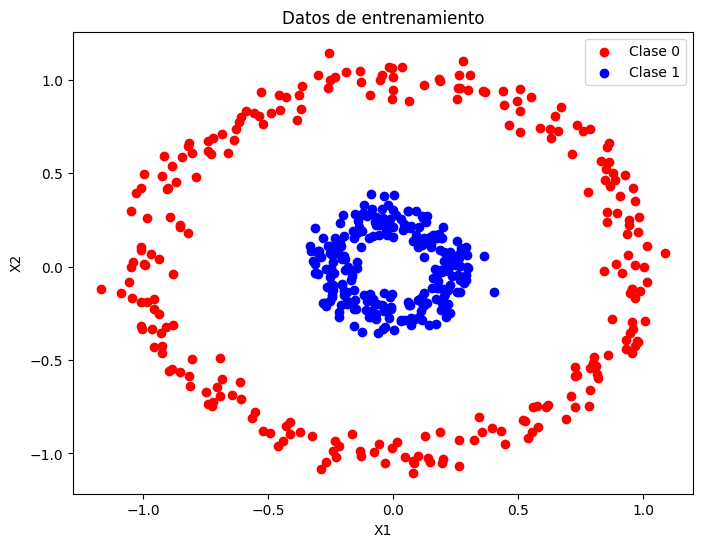

In [12]:
# Graficar los datos
#-----------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], c='r', label='Clase 0')
plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], c='b', label='Clase 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos de entrenamiento')
plt.legend()
plt.show()

### Entrene un PMC

In [13]:
# Separamos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

# Inicializamos el clasificador
mlp = MLPClassifier(hidden_layer_sizes = (3), activation = 'logistic', learning_rate_init = 0.5, max_iter = 500, random_state = 42)

mlp.fit(X_train, y_train)

C:\Users\Laura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', hidden_layer_sizes=3,
              learning_rate_init=0.5, max_iter=500, random_state=42)

### Una vez entrenada la red usar la función **plot_decision_regions**  para graficar la frontera de decisión.

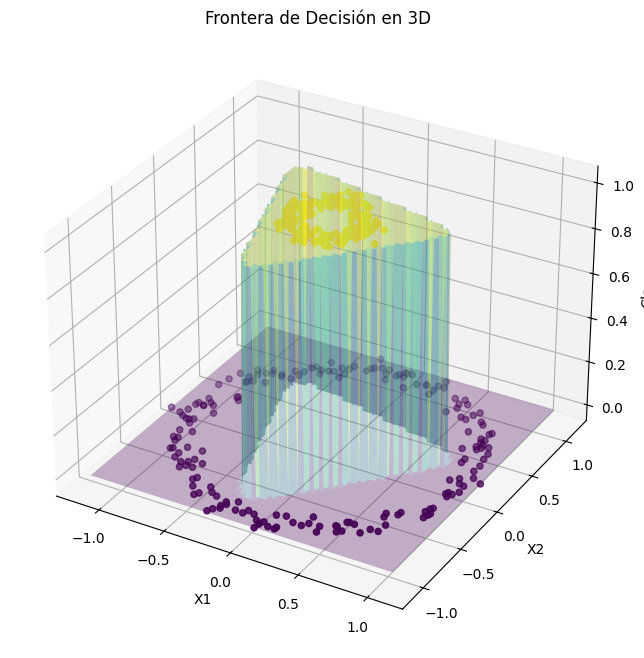

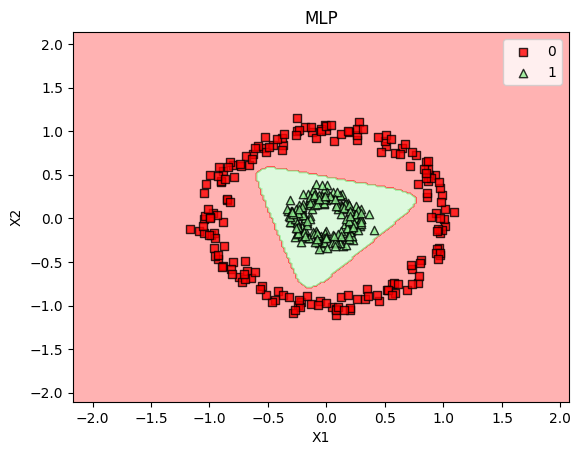

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from modulos.graficacion import plot_decision_regions

# CGrafico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], y_train.flatten(), c=y_train.flatten(), cmap='viridis', marker='o')
x1_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
x2_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)
X_grid = np.c_[x1.ravel(), x2.ravel()]
y_grid = mlp.predict(X_grid).reshape(x1.shape)

ax.plot_surface(x1, x2, y_grid, alpha=0.3, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Clase')
ax.set_title('Frontera de Decisión en 3D')
plt.show()

# Grafico 2D
plot_decision_regions(X_train, y_train.flatten(), mlp, resolution = 0.02)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('MLP')
plt.legend()
plt.show()

### Analice cómo sería la transformación de los datos en la capa oculta para este ejercicio

- En qué dimensión están los datos luego de la transformación de la capa oculta. Cómo es la función que separa los datos? De forma opcional puede realizar la transformación y graficarla.

# De acá para abajo reever

In [19]:
import plotly.graph_objs as go
import plotly.express as px

# Transformar los datos en la capa oculta
salida_capa_oculta = logistic(np.dot(X, mlp.coefs_[0]) + mlp.intercepts_[0])

# Crear una figura 3D interactiva
fig = go.Figure()

# Agregar los datos transformados
fig.add_trace(go.Scatter3d(
    x=salida_capa_oculta[y.flatten() == 0, 0],
    y=salida_capa_oculta[y.flatten() == 0, 1],
    z=salida_capa_oculta[y.flatten() == 0, 2],
    mode='markers',
    marker=dict(color='red'),
    name='Clase 0'
))

fig.add_trace(go.Scatter3d(
    x=salida_capa_oculta[y.sflatten() == 1, 0],
    y=salida_capa_oculta[y.flatten() == 1, 1],
    z=salida_capa_oculta[y.flatten() == 1, 2],
    mode='markers',
    marker=dict(color='blue'),
    name='Clase 1'
))

# Configurar etiquetas y título
fig.update_layout(
    scene=dict(
        xaxis_title='Salida Neurona 1',
        yaxis_title='Salida Neurona 2',
        zaxis_title='Salida Neurona 3'
    ),
    title='Transformación de los Datos en la Capa Oculta'
)

# Mostrar la figura
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

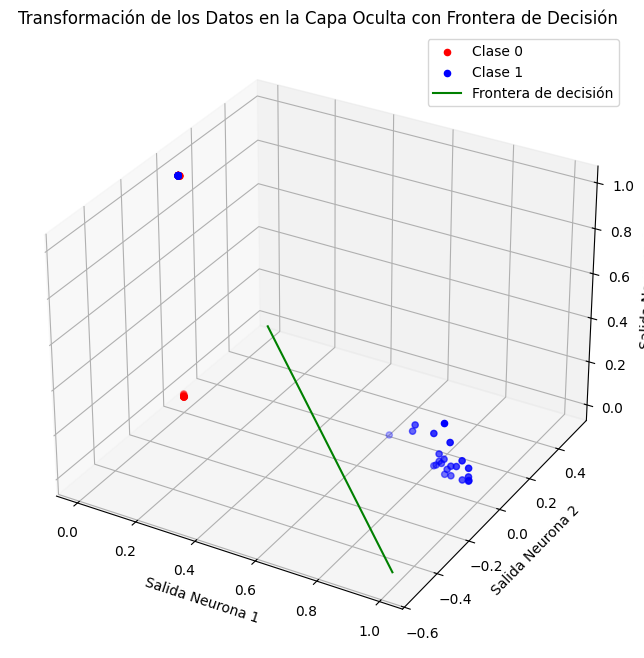

In [139]:
# Graficar los datos transformados en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos transformados
ax.scatter(salida_capa_oculta[y.flatten() == 0, 0], salida_capa_oculta[y.flatten() == 0, 1], salida_capa_oculta[y.flatten() == 0, 2], c='r', label='Clase 0')
ax.scatter(salida_capa_oculta[y.flatten() == 1, 0], salida_capa_oculta[y.flatten() == 1, 1], salida_capa_oculta[y.flatten() == 1, 2], c='b', label='Clase 1')

# Graficar la frontera de decisión
x_vals = np.linspace(0, 1, 100)
y_vals = pendiente_salida * x_vals + ordenada_salida
z_vals = np.zeros_like(x_vals)  # Asumimos que la frontera de decisión es plana en el eje Z

ax.plot(x_vals, y_vals, z_vals, 'g-', label='Frontera de decisión')

# Etiquetas y título
ax.set_xlabel('Salida Neurona 1')
ax.set_ylabel('Salida Neurona 2')
ax.set_zlabel('Salida Neurona 3')
ax.set_title('Transformación de los Datos en la Capa Oculta con Frontera de Decisión')
ax.legend()
plt.show()